### Basic Operations on Images
Access pixel values and modify them

Access image properties

Set a Region of Interest (ROI)

Split and merge images

In [2]:
import numpy as np
import cv2 as cv
img = cv.imread('messi5.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
img = cv.bitwise_not(img)

You can access a pixel value by its row and column coordinates. For BGR image, it returns an array of Blue, Green, Red values. For grayscale image, just corresponding intensity is returned.

In [3]:
px = img[100,100]
print( px )
# [157 166 200]

# accessing only blue pixel
blue = img[100,100,0]
print( blue )
# 157

[198 192 187]
198


You can modify the pixel values the same way.

In [4]:
img[100,100] = [255,255,255]
print( img[100,100] )
# [255 255 255]

[255 255 255]


Numpy is an optimized library for fast array calculations. So simply accessing each and every pixel value and modifying it will be very slow and it is discouraged.

Better pixel accessing and editing method :

In [5]:
# accessing RED value
print(img.item(10,10,2))
# 59

# modifying RED value
img[10,10,2] = 100
img.item(10,10,2)
# 100

206


100

### Accessing Image Properties
Image properties include number of rows, columns, and channels; type of image data; number of pixels; etc.

The shape of an image is accessed by img.shape. It returns a tuple of the number of rows, columns, and channels (if the image is color):

In [6]:
print( img.shape )
# (342, 548, 3)
# If an image is grayscale, the tuple returned contains only the number of rows and columns, so it is a good method to check whether the loaded image is grayscale or color.

(280, 450, 3)


Total number of pixels is accessed by img.size:

In [7]:
print( img.size )
# 562248

378000


Image datatype is obtained by `img.dtype`:

In [8]:
print( img.dtype )
# uint8

uint8


Image ROI

In [9]:
ball = img[225:280, 275:325]
img[225:280, 400:450] = ball

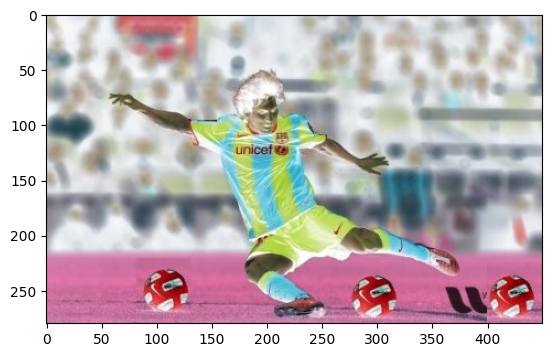

In [10]:
import matplotlib.pyplot as plt
plt.imshow(img)
plt.show()

### Splitting and Merging Image Channels
Sometimes you will need to work separately on the B,G,R channels of an image. In this case, you need to split the BGR image into single channels. In other cases, you may need to join these individual channels to create a BGR image. You can do this simply by:

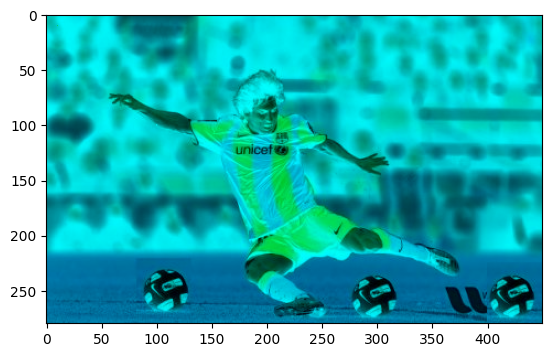

In [11]:
# cv.split() is a costly operation (in terms of time). So use it only if necessary. Otherwise go for Numpy indexing.
b,g,r = cv.split(img)
img = cv.merge((b,g,r))
# Or
b = img[:,:,0]
# Suppose you want to set all the red pixels to zero - you do not need to split the channels first. Numpy indexing is faster:
img[:,:,0] = 0

plt.imshow(img)
plt.show()

### Making Borders for Images (Padding)
If you want to create a border around an image, something like a photo frame, you can use cv.copyMakeBorder(). But it has more applications for convolution operation, zero padding etc. This function takes following arguments:

Below is a sample code demonstrating all border types for better understanding:

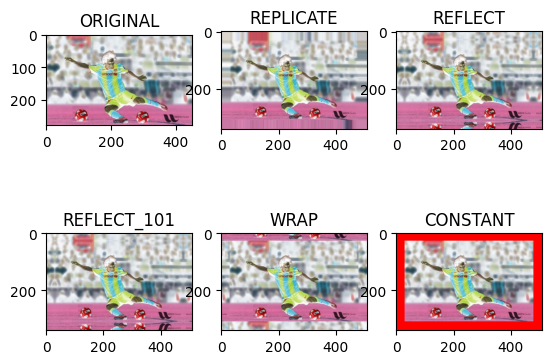

In [12]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

# img1 = cv.imread('opencv-logo.png')
img1 = cv.imread('messi5.jpg')
img1 = cv.bitwise_not(img1)
assert img1 is not None, "file could not be read, check with os.path.exists()"

replicate = cv.copyMakeBorder(img1,30,30,30,30,cv.BORDER_REPLICATE)
reflect = cv.copyMakeBorder(img1,30,30,30,30,cv.BORDER_REFLECT)
reflect101 = cv.copyMakeBorder(img1,30,30,30,30,cv.BORDER_REFLECT_101)
wrap = cv.copyMakeBorder(img1,30,30,30,30,cv.BORDER_WRAP)
constant= cv.copyMakeBorder(img1,30,30,30,30,cv.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

### Arithmetic Operations on Images
Learn several arithmetic operations on images, like addition, subtraction, bitwise operations, and etc.

Learn these functions: cv.add(), cv.addWeighted(), etc.

In [13]:
# Adding Images
# There is a difference between OpenCV addition and Numpy addition. OpenCV addition is a saturated operation while Numpy addition is a modulo operation.

x = np.uint8([250])
y = np.uint8([10])

print( cv.add(x,y) ) # 250+10 = 260 => 255
# [[255]]

print( x+y )          # 250+10 = 260 % 256 = 4
# [4]

[[260.]
 [  0.]
 [  0.]
 [  0.]]
[4]


### Image Blending

This is also image addition, but different weights are given to images in order to give a feeling of blending or transparency.

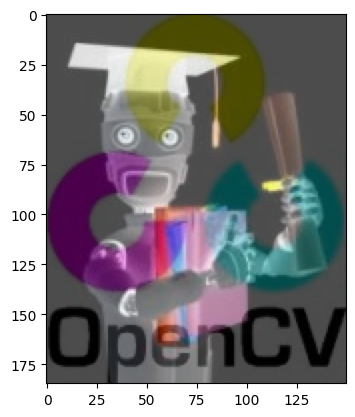

In [14]:
img1 = cv.imread('pic1.png')
img1 = cv.bitwise_not(img1)
img2 = cv.imread('pic2.png')
img2 = cv.bitwise_not(img2)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

dst1 = cv.addWeighted(img1,0.7,img2,0.3,0)

# cv.imshow('dst',dst)
# cv.waitKey(0)
# cv.destroyAllWindows()

plt.imshow(dst1)
plt.show()


### Bitwise Operations

This includes the bitwise AND, OR, NOT, and XOR operations

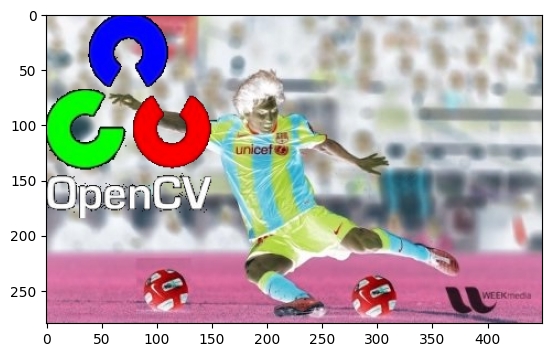

In [18]:
# Load two images
img1 = cv.imread('messi5.jpg')
img1 = cv.bitwise_not(img1)
img2 = cv.imread('pic2.png')
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]

# Now create a mask of logo and create its inverse mask also
img2gray = cv.cvtColor(img2,cv.COLOR_BGR2GRAY)
ret, mask = cv.threshold(img2gray, 10, 255, cv.THRESH_BINARY)
mask_inv = cv.bitwise_not(mask)

# Now black-out the area of logo in ROI
img1_bg = cv.bitwise_and(roi,roi,mask = mask_inv)

# Take only region of logo from logo image.
img2_fg = cv.bitwise_and(img2,img2,mask = mask)

# Put logo in ROI and modify the main image
dst = cv.add(img1_bg,img2_fg)
img1[0:rows, 0:cols ] = dst

# cv.imshow('res',img1)
# cv.waitKey(0)
# cv.destroyAllWindows()
plt.imshow(img1)
plt.show()

### Exercises
Create a slide show of images

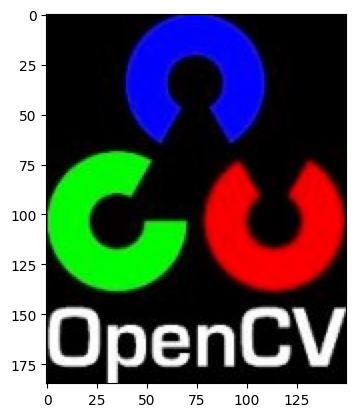

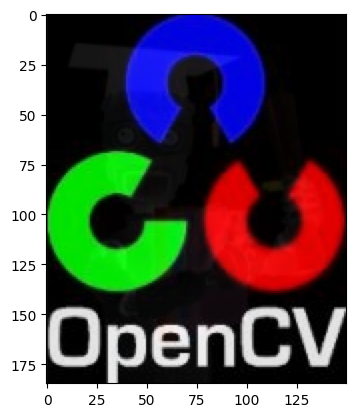

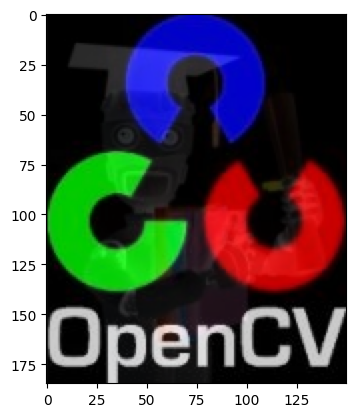

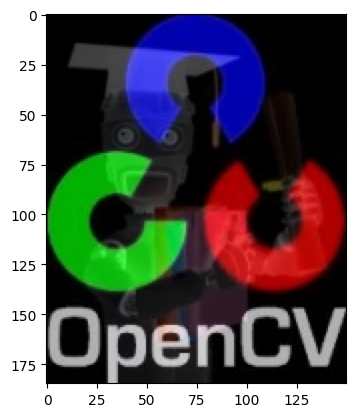

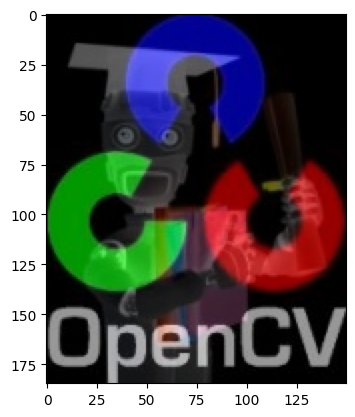

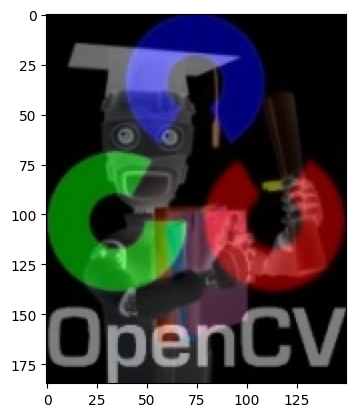

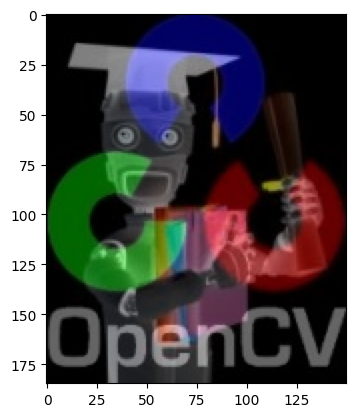

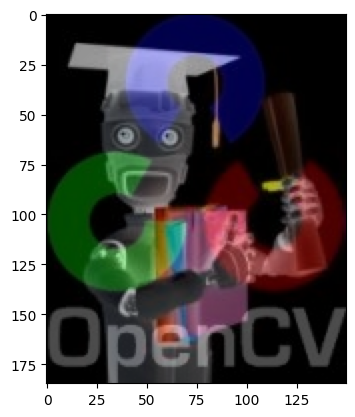

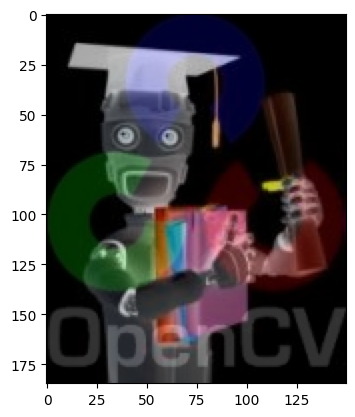

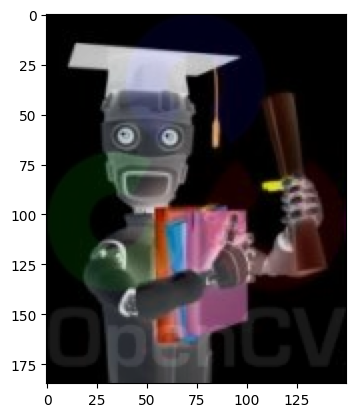

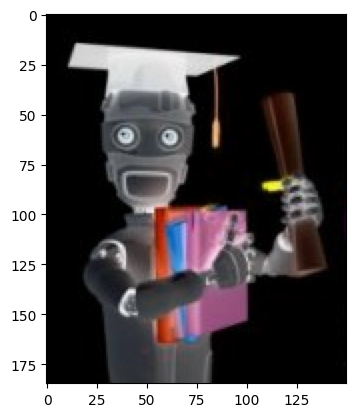

In [16]:
img1 = cv.imread('pic1.png')
# img1 = cv.bitwise_not(img1)
img2 = cv.imread('pic2.png')
img2 = cv.bitwise_not(img2)
assert img1 is not None, "file could not be read, check with os.path.exists()"
assert img2 is not None, "file could not be read, check with os.path.exists()"

for i in range(0,10+1):

    dst = cv.addWeighted(img1, i/10 ,img2,1 - (i/10),0)
    cv.imwrite(f'C:/TEMP/dst{i}.png', dst)
    dst = cv.bitwise_not(dst)
    plt.imshow(dst)
    plt.show()